In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import smplotlib 

In [5]:
def return_data(l1_id:int):

    bondprices = pd.read_csv('/Users/tkiker/Documents/GitHub/US-Federal-Debt-Public/Industrial-Suite/DataFrames/BondPrice.csv')

    # 3. find which row has value based on location one of the columns

    l1_ids = bondprices['L1 ID'].values 


    idx = np.where(l1_ids==l1_id)[0] # have a note about this when using np.where()! 
    idx = idx[0] # have a note about this! 

    # 4. get row by index
    row = bondprices.iloc[[idx]] # have a note about getting row by index! 

    dates = list(row)
    prices = row.values[0] # get values of row 

    # get rid of first two items for each which are labels not data

    dates = dates[2:]
    prices = prices[2:]

    # turn date strings into datetime values 
    dates = pd.to_datetime(dates)

    return dates, prices

In [6]:
def make_plot(title, dates, prices, vlines:list, directions: list, scaling_factors:list, plot_dir:str='/Users/tkiker/Documents/GitHub/HistoricalEconomics/figures/panama-canal-report'):
    r'''
    function for making plot

    Parameters
    ----------
    vline_labels: list of strings in 'Year-Month-Day' format.
    directions: list of integers specifying angle offsets for the annotations.
    '''

    import matplotlib.dates as mdates
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import os 
    import string
    
    dates = pd.to_datetime(dates)
    
    prices = np.array(prices).astype(float)
    nan_mask = ~np.isnan(prices)
    dates, prices = dates[nan_mask], prices[nan_mask]
    
    fig, ax = plt.subplots(figsize=(5, 5))

    ax.plot(dates, prices)
    ax.set(xlabel='Year', ylabel='Price', title=title)

    ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Set major ticks to every 2 years
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the ticks to show the year

    min_price = min(prices)
    max_price = max(prices)
    arrow_length_days = 10  # Standard length for arrows in days
    arrow_length_price = (max_price - min_price) * 0.5  # Standard length for arrows in price

    # Generate labels A, B, C, etc.
    letters = list(string.ascii_uppercase)

    for idx, (i, angle, scaling_factor) in enumerate(zip(vlines, directions, scaling_factors)):
        date = pd.to_datetime(i)
        nearest_date_idx = np.argmin(np.abs(dates - date))  # Find the index of the nearest date
        price_at_date = prices[nearest_date_idx]  # Get the nearest price value
        label = letters[idx % len(letters)]  # Wrap around if more than 26 labels

        # Calculate the end point of the arrow based on the angle
        radians = np.deg2rad(angle)
        dx = arrow_length_days * np.cos(radians) * scaling_factor
        dy = arrow_length_price * np.sin(radians) * scaling_factor 

        # Calculate the end date by converting dx to a timedelta
        end_date = date + pd.Timedelta(days=dx)
        price_at_date_end = price_at_date + dy

        # Ensure the labels don't go beyond the plot area
        end_date = max(min(end_date, dates.max()), dates.min())
        price_at_date_end = max(min(price_at_date_end, max_price), min_price)

        # Draw the line and the label
        ax.annotate('', xy=(date, price_at_date), xytext=(end_date, price_at_date_end),
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5, linestyle='dashed'))
        ax.text(end_date, price_at_date_end, label, fontsize=10, fontweight='bold')

        ax.set(xlim=(pd.to_datetime('01-01-1913'), pd.to_datetime('01-01-1923')))

    fig.tight_layout()
    plt.savefig(os.path.join(plot_dir, f'{title}.png'))
    plt.show()

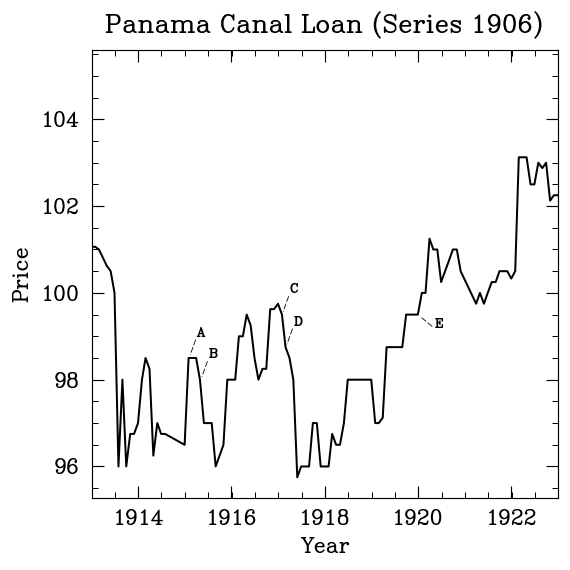

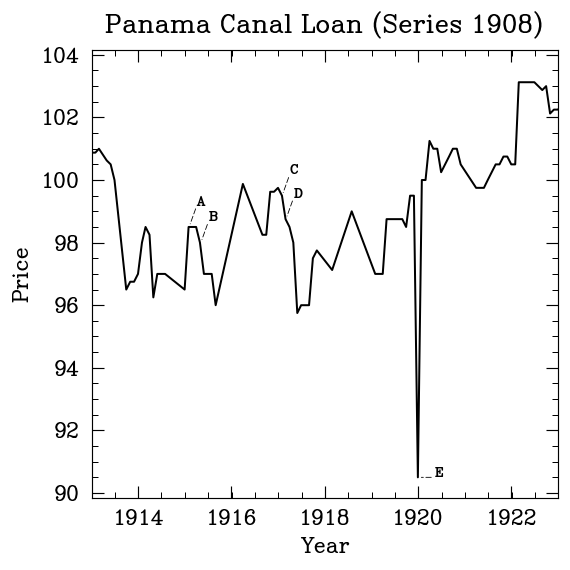

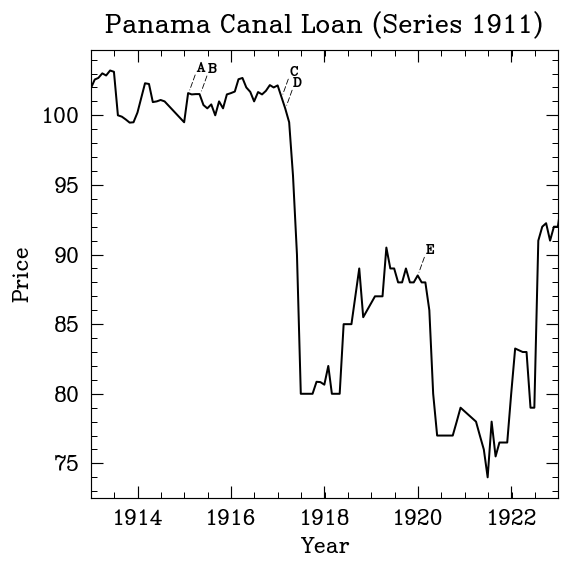

In [7]:
titles = ['Panama Canal Loan (Series 1906)', 'Panama Canal Loan (Series 1908)', 'Panama Canal Loan (Series 1911)'] 
l1_ids = [20132, 20133, 20134]

panama_lines = ['1915-02-04', '1915-05-07', '1917-02-01', '1917-03-03', '1920-01-01']
panama_labels = ['War Zone around Britain', 'Lusitania Sinks', 'U-Boat Restrictions Lifted', 'Zimmerman Telegram Released', 'Global Depression Begins']

directions = [1, 1, 1, 1, -0.3]
directions = [directions, directions, [1,1,1,1,1]]
scaling_factors = [6, 6, 6, 6, 13]
scaling_factors = [scaling_factors, scaling_factors, [6,6,6,6,6]]

# unrelated panama: sinking of titanic, Germany failing to pay reparations and france occuping industrial border regions
# no clear effect: england declaring war 

vlines = 4*[panama_lines]

#war of 1812 bond - 20051

for l1_id, title, vlines, dir_list, scaling_factor in zip(l1_ids, titles, vlines, directions, scaling_factors):
    dates, prices = return_data(l1_id)
    
    prices = prices.astype(float)
    nan_mask = ~np.isnan(prices)
    dates, prices = dates[nan_mask], prices[nan_mask]

    #date_mask = np.logical_and(dates>pd.to_datetime('01-01-1913'), dates<pd.to_datetime('01-01-1923'))
    #dates, prices = dates[date_mask], prices[date_mask]

    make_plot(title, dates, prices, vlines=vlines, directions=dir_list, scaling_factors=scaling_factor)

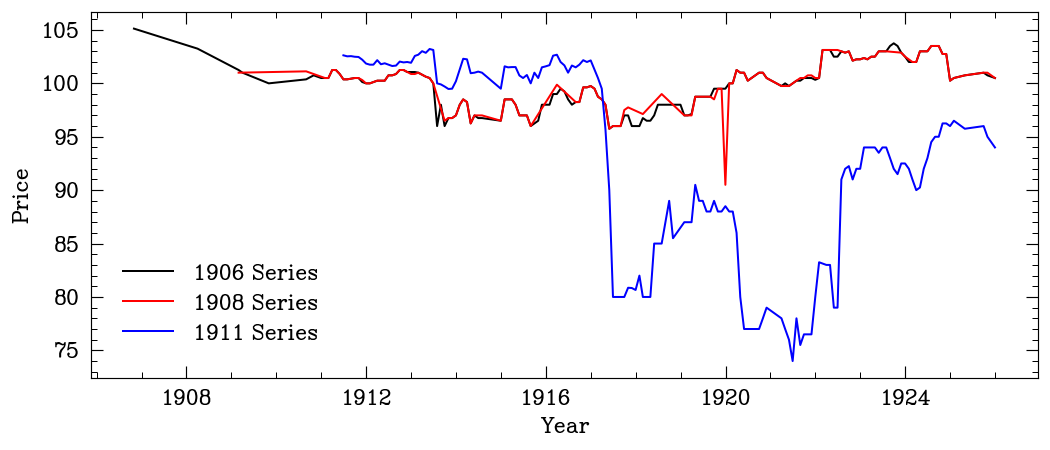

In [22]:
fig, ax = plt.subplots(figsize=(9, 4))

for l1_id, bond_series, c in zip(l1_ids, ['1906 Series', '1908 Series', '1911 Series'], ['black', 'red', 'blue']):
    dates, prices = return_data(l1_id)
    
    prices = prices.astype(float)
    nan_mask = ~np.isnan(prices)
    dates, prices = dates[nan_mask], prices[nan_mask]

    ax.plot(dates, prices, label=bond_series, color=c)

ax.legend(fontsize='medium')
ax.set(xlabel='Year', ylabel='Price')#, title='Combined Time Series')
fig.tight_layout()

plt.savefig('/Users/tkiker/Documents/GitHub/HistoricalEconomics/figures/panama-canal-report/Panama Canal Bonds Time Series.png')